<a href="https://colab.research.google.com/github/Mlnvl/python_classp/blob/main/My_DV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Select a Dataset

I choose the data set Video Game Sales 2024 from kaggle.

https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024/data


#Step 2: Tasks and Requirements

##Loading and exploration

In [ ]:
#import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset from google drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Pandas_data/Video_Games_Sales_as_at_22_Dec_2016.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

##Cleaning

In [ ]:
try:
  import janitor
except:
  print("Module is not preinstalled!Installing now...")
  !pip install pyjanitor --quiet

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from janitor import clean_names

df = clean_names(df)
df.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
name,2
platform,0
year_of_release,269
genre,2
publisher,54
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


In [ ]:
# Supposons que votre DataFrame s'appelle 'df'
# et que vous souhaitez supprimer les colonnes 'colonne1', 'colonne2' et 'colonne3'.

columns_to_drop = ['critic_score', 'critic_count','user_count','developer','rating']

# Méthode 1 : Utilisation de drop()
df = df.drop(columns=columns_to_drop)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
name,0
platform,0
year_of_release,0
genre,0
publisher,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


In [ ]:
df = df[df["year_of_release"].notnull()]
df = df[df["genre"].notnull()]
df = df[df["publisher"].notnull()]
df = df[df["user_score"].notnull()] #I finaly choose de drop all row with missing user_score because remplacing with mean, median evan by minimizing extrem, changed too much our dataset and would reduce reliability
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score']=df['user_score'].replace('tbd',0).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9837 entries, 0 to 16710
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9837 non-null   object 
 1   platform         9837 non-null   object 
 2   year_of_release  9837 non-null   Int64  
 3   genre            9837 non-null   object 
 4   publisher        9837 non-null   object 
 5   na_sales         9837 non-null   float64
 6   eu_sales         9837 non-null   float64
 7   jp_sales         9837 non-null   float64
 8   other_sales      9837 non-null   float64
 9   global_sales     9837 non-null   float64
 10  user_score       9837 non-null   float64
dtypes: Int64(1), float64(6), object(4)
memory usage: 931.8+ KB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe().transpose()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
year_of_release,9837.0,2007.63007,4.117786,1985.0,2005.0,2008.0,2010.0,2020.0
na_sales,9837.0,0.316552,0.823076,0.0,0.05,0.12,0.3,41.36
eu_sales,9837.0,0.182119,0.585126,0.0,0.01,0.04,0.15,28.96
jp_sales,9837.0,0.046121,0.242058,0.0,0.0,0.0,0.0,6.5
other_sales,9837.0,0.064409,0.229266,0.0,0.01,0.02,0.05,10.57
global_sales,9837.0,0.609453,1.66844,0.01,0.08,0.21,0.56,82.53
user_score,9837.0,5.405489,3.318127,0.0,2.4,6.9,8.0,9.7


In [ ]:
df.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9837, 11)

##Filter, sort, and group data and Mathematical Operations

In [ ]:
filtered_df = df[(df['year_of_release'] > 2000) & (df['user_score'] > 8)]
filtered_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,user_score
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.5
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,8.4
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,8.6
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,8.2


In [ ]:
sorted_df = df.sort_values(by=['global_sales'], ascending=False)
sorted_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,user_score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.5
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,6.6


In [ ]:
grouped_df = df.groupby('genre')['user_score'].mean()
grouped_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_score
genre,
Action,5.857856
Adventure,4.686344
Fighting,6.671065
Misc,3.359839
Platform,5.541503
Puzzle,2.679580
Racing,5.161655
Role-Playing,7.326206
Shooter,6.383200


In [ ]:
filtered_df = df[df['year_of_release'] > 2000]
grouped_df = filtered_df.groupby('publisher')['user_score'].mean()
top_5_publishers = grouped_df.sort_values(ascending=False).head(5)
top_5_publishers

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_score
publisher,
Sunflowers,9.1
Square,9.1
Blue Byte,8.8
Kool Kizz,8.8
SNK,8.8


In [ ]:
import pandas as pd

# Créer un tableau croisé dynamique pour la somme des ventes par genre et par région
sales_by_region_genre = pd.pivot_table(
    df,
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales','global_sales'],
    index=['genre'],
    aggfunc='sum'
)
# Afficher le résultat
sales_by_region_genre.sort_values(by='global_sales', ascending=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,eu_sales,global_sales,jp_sales,na_sales,other_sales
genre,,,,,
Action,423.68,1332.65,79.93,667.48,160.79
Sports,287.82,982.39,37.57,545.04,111.51
Shooter,270.22,845.02,19.09,464.45,90.90
Misc,146.14,532.13,33.95,299.33,52.47
Racing,175.34,522.39,28.90,255.19,62.99
Role-Playing,120.67,509.91,124.61,223.63,41.19
Platform,119.04,414.59,43.32,216.81,35.26
Simulation,85.86,277.07,28.24,138.98,23.87
Fighting,63.19,260.21,28.56,141.72,26.69


In [ ]:
import pandas as pd

# Create a new column 'decade' based on 'year_of_release'
df['decade'] = (df['year_of_release'] // 10) * 10

# Group by 'decade' and 'genre', then count the number of games
games_per_decade_genre = df.groupby(['decade', 'genre'])['name'].count().reset_index()

# Rename the 'name' column to 'count'
games_per_decade_genre = games_per_decade_genre.rename(columns={'name': 'count'})

# Display the result
print(games_per_decade_genre)

    decade         genre  count
0     1980    Simulation      2
1     1990        Action     15
2     1990     Adventure      4
3     1990      Fighting      9
4     1990          Misc      3
5     1990      Platform      6
6     1990        Puzzle      3
7     1990        Racing     10
8     1990  Role-Playing     21
9     1990       Shooter      7
10    1990    Simulation      6
11    1990        Sports      4
12    1990      Strategy     11
13    2000        Action   1240
14    2000     Adventure    298
15    2000      Fighting    286
16    2000          Misc    553
17    2000      Platform    429
18    2000        Puzzle    254
19    2000        Racing    665
20    2000  Role-Playing    479
21    2000       Shooter    642
22    2000    Simulation    415
23    2000        Sports   1053
24    2000      Strategy    245
25    2010        Action    909
26    2010     Adventure    152
27    2010      Fighting    137
28    2010          Misc    313
29    2010      Platform    124
30    20

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Group by 'year_of_release' and get the game with the highest 'global_sales' for each year
best_selling_games_by_year = df.loc[df.groupby('year_of_release')['global_sales'].idxmax()]

# Select only the desired columns for the table
best_selling_games_table = best_selling_games_by_year[['year_of_release', 'name', 'global_sales']]

# Display the table
print(best_selling_games_table)

       year_of_release                            name  global_sales
14472             1985                       Alter Ego          0.03
14623             1988                         SimCity          0.03
14612             1992                            Doom          0.03
1567              1994          Battle Arena Toshinden          1.27
153               1996                        Tekken 2          5.74
52                1997                    Gran Turismo         10.95
106               1998                        Tekken 3          7.16
67                1999                  Gran Turismo 2          9.49
175               2000                Final Fantasy IX          5.30
28                2001          Gran Turismo 3: A-Spec         14.98
24                2002     Grand Theft Auto: Vice City         16.15
102               2003      Need for Speed Underground          7.20
17                2004   Grand Theft Auto: San Andreas         20.81
11                2005            

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

def top_3_genres_by_platform(df):
    # Group by platform and genre, then sum global sales
    genre_sales_by_platform = df.groupby(['platform', 'genre'])['global_sales'].sum().reset_index()

    # Get the top 3 genres for each platform
    top_3_genres = genre_sales_by_platform.groupby('platform').apply(
        lambda x: x.sort_values('global_sales', ascending=False).head(3)
    ).reset_index(drop=True)

    return top_3_genres

# Call the function to get the results
top_3_genres_df = top_3_genres_by_platform(df)

# Display the results
print(top_3_genres_df)

   platform         genre  global_sales
0       3DS        Action         34.36
1       3DS      Platform         27.78
2       3DS  Role-Playing         18.94
3        DC     Adventure          1.33
4        DC        Sports          1.09
5        DC  Role-Playing          0.68
6        DS          Misc         95.79
7        DS    Simulation         92.92
8        DS        Action         74.67
9       GBA      Platform         53.78
10      GBA        Action         41.46
11      GBA  Role-Playing         21.20
12       GC        Action         32.39
13       GC      Platform         27.06
14       GC        Sports         23.33
15       PC  Role-Playing         44.87
16       PC    Simulation         43.58
17       PC       Shooter         36.55
18       PS        Action         58.32
19       PS  Role-Playing         44.07
20       PS        Racing         40.30
21      PS2        Action        247.81
22      PS2        Sports        225.22
23      PS2        Racing        139.12


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-138-c0edff417ab4>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_genres = genre_sales_by_platform.groupby('platform').apply(


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

def most_correlated_genre_by_platform(df):
    # Group by platform and genre, then sum global sales
    genre_sales_by_platform = df.groupby(['platform', 'genre'])['global_sales'].sum().reset_index()

    # Get the genre with the highest sales for each platform
    most_correlated_genre = genre_sales_by_platform.loc[genre_sales_by_platform.groupby('platform')['global_sales'].idxmax()]

    # Select only the desired columns for the table
    most_correlated_genre_table = most_correlated_genre[['platform', 'genre', 'global_sales']]

    return most_correlated_genre_table

# Call the function to get the results
most_correlated_genre_df = most_correlated_genre_by_platform(df)

# Display the results
print(most_correlated_genre_df)

    platform         genre  global_sales
0        3DS        Action         34.36
12        DC     Adventure          1.33
23        DS          Misc         95.79
36       GBA      Platform         53.78
44        GC        Action         32.39
63        PC  Role-Playing         44.87
68        PS        Action         58.32
80       PS2        Action        247.81
92       PS3        Action        276.30
104      PS4        Action         77.74
116      PSP        Action         52.13
128      PSV        Action         11.25
149      Wii        Sports        255.25
155     WiiU      Platform         21.51
171     X360       Shooter        269.63
183       XB       Shooter         61.05
194     XOne       Shooter         48.38


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

def most_correlated_genre_by_platform(df):
    # Group by platform and genre, then sum global sales
    genre_sales_by_platform = df.groupby(['platform', 'genre'])['global_sales'].sum().reset_index()

    # Calculate the total sales for each platform
    platform_total_sales = genre_sales_by_platform.groupby('platform')['global_sales'].transform('sum')

    # Calculate the relative sales contribution of each genre within its platform
    genre_sales_by_platform['relative_sales'] = genre_sales_by_platform['global_sales'] / platform_total_sales

    # Get the genre with the highest relative sales for each platform
    most_correlated_genre = genre_sales_by_platform.loc[genre_sales_by_platform.groupby('platform')['relative_sales'].idxmax()]

    # Select only the desired columns for the table
    most_correlated_genre_table = most_correlated_genre[['platform', 'genre', 'relative_sales']]

    return most_correlated_genre_table

# Call the function to get the results
most_correlated_genre_df = most_correlated_genre_by_platform(df)

# Display the results
print(most_correlated_genre_df)

    platform         genre  relative_sales
0        3DS        Action        0.261671
12        DC     Adventure        0.292308
23        DS          Misc        0.170645
36       GBA      Platform        0.287041
44        GC        Action        0.188797
63        PC  Role-Playing        0.216952
68        PS        Action        0.256217
80       PS2        Action        0.237082
92       PS3        Action        0.329234
104      PS4        Action        0.317138
116      PSP        Action        0.245618
128      PSV        Action        0.325145
149      Wii        Sports        0.320819
155     WiiU      Platform        0.318337
171     X360       Shooter        0.299110
183       XB       Shooter        0.267060
194     XOne       Shooter        0.358477


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import statsmodels.api as sm

regression_df = df[['user_score','eu_sales', 'na_sales','jp_sales','other_sales' , 'global_sales']]

# Preparing data
X = regression_df['user_score']  # Independent variable
dependent_vars = ['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'global_sales']

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Looping through dependent variables
for dep_var in dependent_vars:
    y = regression_df[dep_var]  # Selecting the dependent variable

    # Fitting the linear regression model
    model = sm.OLS(y, X).fit()

    print(f"Regression results for {dep_var}:")

    # Checking for dependence based on p-value
    if model.pvalues['user_score'] < 0.05:
        print("  There is dependence between user_score and", dep_var)

        # Checking the direction of the relationship
        if model.params['user_score'] > 0:
            print("  The relationship between user_score and", dep_var, "is positive.")
        else:
            print("  The relationship between user_score and", dep_var, "is negative.")

        # Printing the percentage of sales explained
        print(f"  The user_score explains {model.rsquared * 100:.2f}% of the variance in {dep_var}.")

    else:
        print("  There is independence between user_score and", dep_var)

    print("\n" + "-" * 50 + "\n")  # Separator for clarity

Regression results for eu_sales:
  There is dependence between user_score and eu_sales
  The relationship between user_score and eu_sales is positive.
  The user_score explains 2.08% of the variance in eu_sales.

--------------------------------------------------

Regression results for na_sales:
  There is dependence between user_score and na_sales
  The relationship between user_score and na_sales is positive.
  The user_score explains 2.36% of the variance in na_sales.

--------------------------------------------------

Regression results for jp_sales:
  There is dependence between user_score and jp_sales
  The relationship between user_score and jp_sales is positive.
  The user_score explains 2.02% of the variance in jp_sales.

--------------------------------------------------

Regression results for other_sales:
  There is dependence between user_score and other_sales
  The relationship between user_score and other_sales is positive.
  The user_score explains 1.74% of the varian

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Data Visualization

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


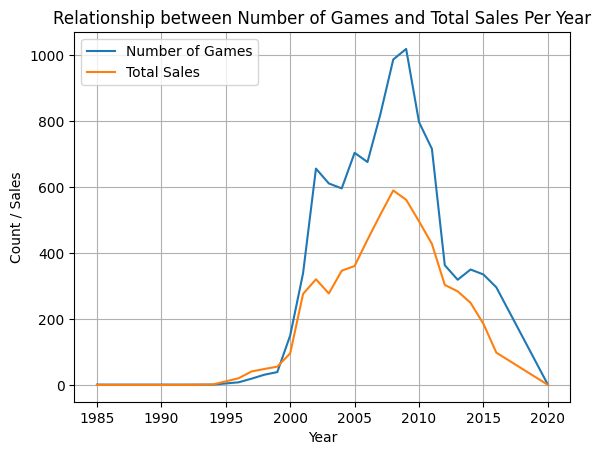

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'year_of_release' and calculate the number of games and total sales
games_and_sales_by_year = df.groupby('year_of_release').agg(
    num_games=('name', 'count'),
    total_sales=('global_sales', 'sum')
).reset_index()

# Create a line plot
plt.plot(games_and_sales_by_year['year_of_release'], games_and_sales_by_year['num_games'], label='Number of Games')
plt.plot(games_and_sales_by_year['year_of_release'], games_and_sales_by_year['total_sales'], label='Total Sales')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count / Sales')
plt.title('Relationship between Number of Games and Total Sales Per Year')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()